In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('huatu.xlsx', header=0)
df = df.drop(0)


In [3]:

y1 = df.iloc[:, 0]
y2 = df.iloc[:, 1]
hv = df.iloc[:, 2]

y1_new = df.iloc[:, 4]
y2_new = df.iloc[:, 5]
hv_new = df.iloc[:, 8]

y1_var = df.iloc[:, 6]
y2_var = df.iloc[:, 7]

y1_new = y1_new.values[~np.isnan(y1_new.values)]
y2_new = y2_new .values[~np.isnan(y2_new.values)]
hv_new = hv_new.values[~np.isnan(hv_new.values)]

y1_var = y1_var.values[~np.isnan(y1_var.values)]
y2_var = y2_var.values[~np.isnan(y2_var.values)]


ref_point = [ 0.1895, -3.0066]

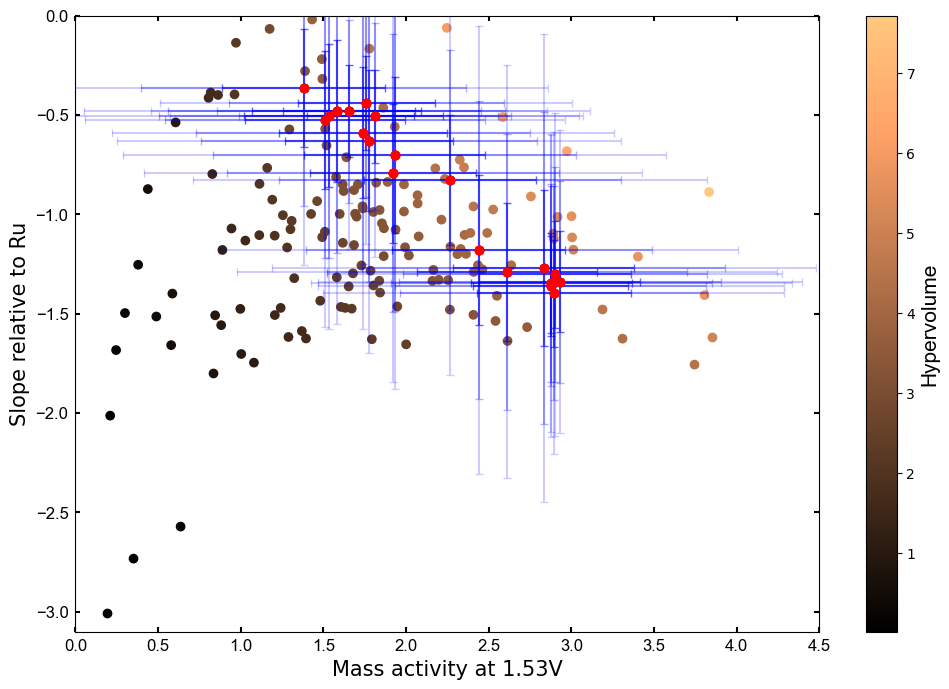

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 8))

# Plot reference point
plt.scatter(ref_point[0], ref_point[1], color='black')

# Set x-axis limits and ticks
plt.xlim(0, 4.5)
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5], fontsize=15, fontname='Arial')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, direction='in', width=1.5, labelsize=12, pad=5)

# Set y-axis limits and ticks
plt.ylim(-3.1, 0)
plt.yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0], fontsize=15, fontname='Arial')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, direction='in', width=1.5, labelsize=12, pad=5)

# Plot scatter points and color map
sc_copper = plt.scatter(y1, y2, c=hv, cmap=plt.cm.get_cmap('copper'))
sc_red = plt.scatter(y1_new, y2_new, color='red')
cbar = plt.colorbar(sc_copper)
cbar.set_label('Hypervolume', fontsize=15, fontname='Arial')

# Plot error bars
for i in [1, 2, 3]:
    plt.errorbar(y1_new, y2_new, xerr=i * np.sqrt(y1_var), yerr=i * np.sqrt(y2_var), fmt='o', color='red', ecolor=(0, 0, 1, 0.6 / i), capsize=3)

# Set axis labels
plt.xlabel('Mass activity at 1.53V', fontsize=15)
plt.ylabel('Slope relative to Ru', fontsize=15)

# Show plot
plt.savefig("OER_pred-scatter.svg", format='svg')
plt.show()


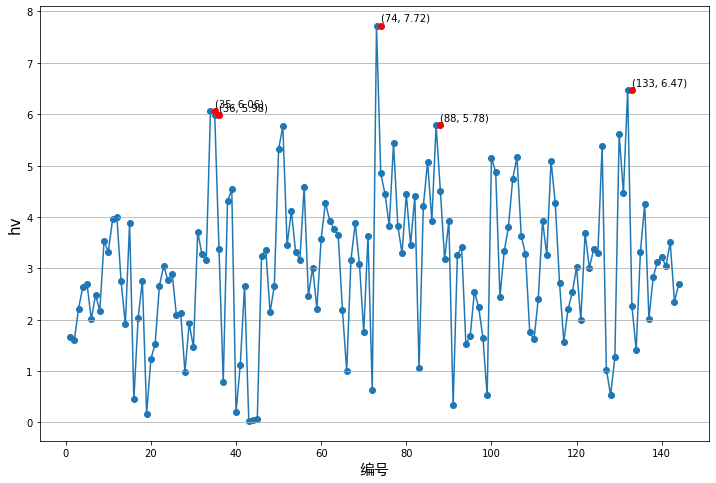

In [25]:
plt.figure(figsize=(12, 8))


plt.scatter(df.index, hv, marker='o')
plt.xlabel('编号', fontproperties='SimHei',fontsize=15)
plt.ylabel('hv',fontsize=15)

plt.plot(df.index, hv)

index = np.argsort(hv)[-5:]



for i in index:
    

    plt.plot(df.index[i+1], hv[i+1], marker='o', c='r')
    plt.annotate('({:.0f}, {:.2f})'.format(df.index[i+1], hv[i+1]), (df.index[i+1], hv[i+1]+0.1))
   


plt.grid(True, axis='y')

plt.show()

In [ ]:
To visualize the data as a picture after PCA (Principal Component Analysis) dimensionality reduction with more than 3 dimensions, you can follow these steps:

1. Perform PCA: Apply PCA to your dataset and obtain the reduced dataset with the desired number of principal components (dimensions). The sklearn.decomposition module in Python is useful for performing PCA.

2. Choose a visualization method: Since it's not possible to directly visualize data in higher dimensions (greater than 3), you will need to use a visualization method suitable for representing high-dimensional data in a 2D or 3D plot.

Some common techniques are:

  a. Biplot: A biplot represents both the principal components (as axes) and the original features (as vectors) in the same graph.

  b. Pairwise scatterplots: You can create scatterplots for each pair of principal components to get an insight into their relationship.

  c. Heatmap: A heatmap can be used to visualize correlations between the original features and the principal components.

3. Select the top principal components: In most scenarios, the first few principal components capture most of the variance in the data. You can choose the top principal components (based on the amount of variance explained) for the visualization.

4. Create the plot: Depending on the chosen visualization method, create the plot using the appropriate Python library such as matplotlib, seaborn, or plotly.

Here's example code for visualizing 4-dimensional PCA data using pairwise scatterplots with Python:


This will produce a scatter plot matrix of all the possible pairs of principal components (PC1 vs PC2, PC1 vs PC3, etc.) that you can use to visualize the 4-dimensional PCA reduced data.

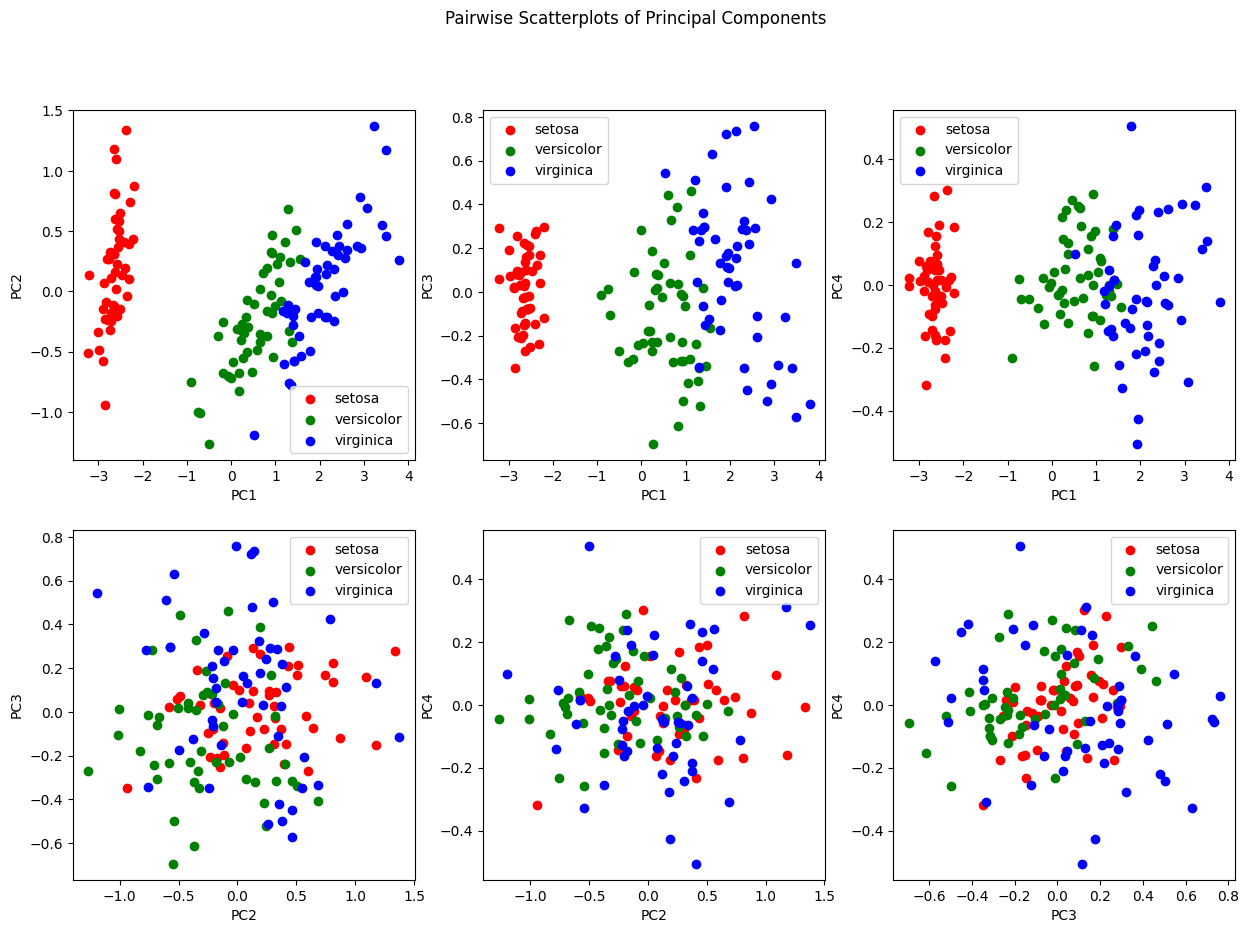

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset and perform PCA
data = load_iris()
X = data.data
y = data.target

pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)

# Pairwise scatterplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, combination in enumerate([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]):
    ax = axes[i // 3, i % 3]
    
    x_data = X_reduced[:, combination[0]]
    y_data = X_reduced[:, combination[1]]
    
    ax.scatter(x_data[y == 0], y_data[y == 0], label=data.target_names[0], color='r')
    ax.scatter(x_data[y == 1], y_data[y == 1], label=data.target_names[1], color='g')
    ax.scatter(x_data[y == 2], y_data[y == 2], label=data.target_names[2], color='b')
    
    ax.set_xlabel(f"PC{combination[0] + 1}")
    ax.set_ylabel(f"PC{combination[1] + 1}")
    ax.legend()

plt.suptitle("Pairwise Scatterplots of Principal Components")
plt.show()

In [ ]:
We'll begin by reducing the dimensions of a dataset using PCA (Principal Component Analysis) and then visualize that reduced data using a heatmap.

Here's a step-by-step guide including sample Python code:


This code will generate a heatmap showing correlations between the original features and the principal components. You can customize the code by changing the dataset, PCA parameters, or heatmap appearance.

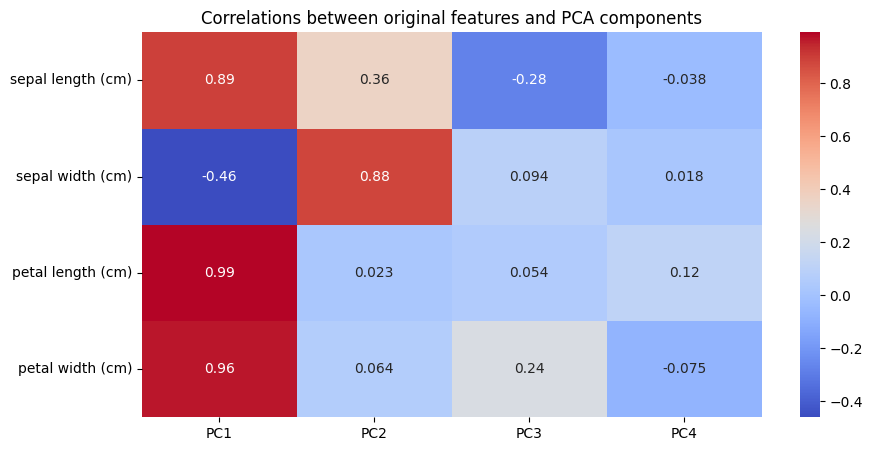

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load sample data
iris = load_iris()

X = iris.data # Feature matrix
y = iris.target # Target vector

# Data preprocessing (Scale the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute the correlations between the original features and PCA components
correlations = np.corrcoef(X_scaled.T, X_pca.T)

# Extract correlations between original features and PCA components
correlations = correlations[:X.shape[1], -X_pca.shape[1]:]
correlations_df = pd.DataFrame(correlations, index=iris.feature_names, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Visualize the heatmap
plt.figure(figsize=(5, 15))
# sns.heatmap(correlations_df, annot=True, cmap="coolwarm")

fig, ax = plt.subplots()
im, cbar = sns.heatmap(correlations_df, annot=True ax=ax, cmap="YlGn", cbarlabel="Correlation")
fig.tight_layout()
plt.title("Correlations between original features and PCA components")
plt.show()


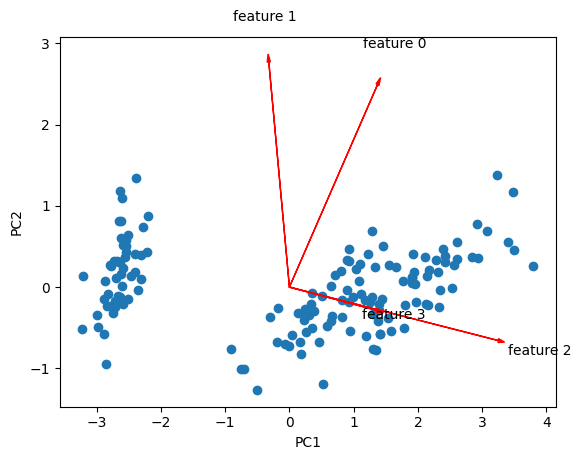

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load Iris dataset and perform PCA
data = load_iris()
X = data.data
y = data.target

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# create a scatter plot of the first two principal components
plt.scatter(x_pca[:, 0], x_pca[:, 1])

# add arrows indicating the original features
feature_vectors = pca.components_.T
for i, v in enumerate(feature_vectors):
    arrow = v * max(x_pca[:, 0])
    plt.arrow(0, 0, arrow[0], arrow[1], fc='r', ec='r',
              head_width=0.05, head_length=0.1)
    plt.text(arrow[0] * 1.2, arrow[1] * 1.2, f'feature {i}',
             ha='center', va='center')

# add labels for the principal components
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


To create a 3D visualization figure of three-dimensional data obtained after PCA reduction using the Iris dataset, you can follow these steps:

1. Import necessary libraries
2. Load the Iris dataset
3. Perform PCA and reduce the dataset to 3 dimensions
4. Plot the 3D visualization

Here is the example Python code:

This code will display a 3D plot of the Iris dataset reduced to three dimensions using PCA. The plot shows data points with different colors for each Iris class (setosa, versicolor, and virginica) after applying the principal component analysis.

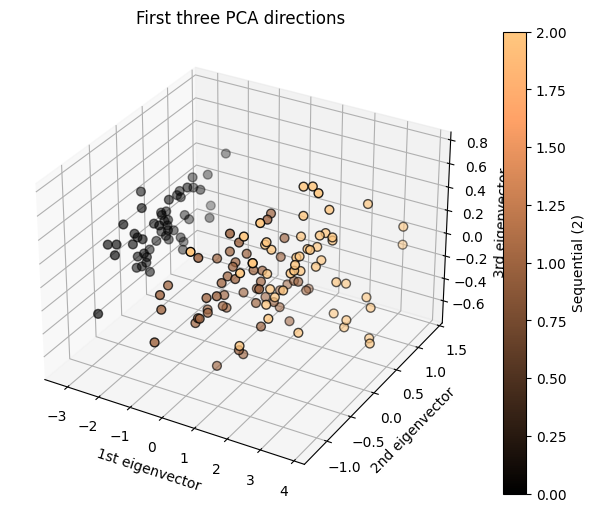

In [4]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 3: Perform PCA and reduce the dataset to 3 dimensions
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Step 4: Plot the 3D visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.get_cmap('copper'), edgecolor='k', s=40)

cbar = plt.colorbar(sc)
cbar.set_label('Sequential (2)')
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()


In [ ]:
To use UCB acquisition function in BoTorch for Bayesian optimization, you will need to follow these general steps:

1. Import necessary libraries and modules.
2. Load/define your data.
3. Train a surrogate model (Single Task GP) with the Matern52 kernel.
4. Implement Upper Confidence Bound (UCB) acquisition function.
5. Optimize the acquisition function to find the next candidate data point.
6. Add the new data point to the dataset and repeat steps 3-6 until the desired stopping criteria.

Here's a code snippet with comments to help guide you through each step:

```python
# Step 1: Import necessary libraries and modules
import torch
import botorch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_model
from aether import FixedNoiseGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.kernels import MaternKernel
from gpytorch.priors import Interval
from botorch.models.transforms import Standardize

# Step 2: Load your data stored in 'train_X' and 'train_Y' tensors
# Make sure your train_X, train_Y tensors have the correct shape
train_X = ...
train_Y = ...
train_Yvar = torch.full_like(train_Y, 0.01)

# Step 3: Train a surrogate model (Single Task GP) with the Matern52 kernel

def initialize_model(train_X, train_Y, state_dict=None):
    # Define the model with input dataset, Matern52 kernel, and custom lengthscale
    model = SingleTaskGP(train_X, train_Y, outcome_transform=Standardize(m=1))
    model.covar_module = MaternKernel(nu=2.5, ard_num_dims=train_X.shape[-1], lengthscale_prior=Interval(0.01,10))
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    
    # Load state_dict if it is provided
    if state_dict is not None:
        model.load_state_dict(state_dict)
    return mll, model

mll, model = initialize_model(train_X, train_Y)
fit_gpytorch_model(mll)

# Step 4: Implement Upper Confidence Bound (UCB) acquisition function
ucb = UpperConfidenceBound(model, beta=0.1) # Use the desired beta value

# Step 5: Optimize the acquisition function to find the next candidate data point
bounds = torch.tensor([[0.], [1.]])  # Set the search space bounds
candidate, _ = optimize_acqf(ucb, bounds=bounds, q=1, num_restarts=5, raw_samples=100)

# Step 6: Add the new data point to the dataset (evaluate function at candidate and append to dataset)
next_x_candidate = candidate
next_y_candidate = ... # Evaluate true function at candidate
train_X = torch.vstack([train_X, next_x_candidate])
train_Y = torch.vstack([train_Y, next_y_candidate])

# Now, repeat steps 3-6 until desired stopping criteria
```

This code should help guide you through the process of using the UCB acquisition function in BoTorch for Bayesian optimization with a SingleTaskGP using a Matern52 kernel and a custom lengthscale. You might need to adapt the provided code snippet to better suit your specific problem and data format.

In [ ]:
The issue here is that the `lengthscale_prior` argument is expecting an object from the `gpytorch.priors.Prior` class, but you are passing an object from the `gpytorch.priors.Interval` class. Instead, you should construct a prior from the Uniform or LogUniform distribution using `gpytorch.priors.UniformPrior` or `gpytorch.priors.LogUniformPrior` with your desired interval.

Here's how to do it:

```python
from gpytorch.priors import UniformPrior
from gpytorch.kernels import MaternKernel

lengthscale_prior = UniformPrior(0.01, 10)

model.covar_module = MaternKernel(nu=2.5, ard_num_dims=train_X.shape[-1], lengthscale_prior=lengthscale_prior)
```

Or alternatively, you can use LogUniformPrior if you prefer:
```python
from gpytorch.priors import LogUniformPrior
from gpytorch.kernels import MaternKernel

lengthscale_prior = LogUniformPrior(0.01, 10)

model.covar_module = MaternKernel(nu=2.5, ard_num_dims=train_X.shape[-1], lengthscale_prior=lengthscale_prior)
```

Make sure to replace `model` and `train_X` with the actual variable names if they are different.

In [ ]:
To set the lengthscale in BoTorch for the model kernel, you will need to first create the kernel and then set its lengthscale property. Let's assume you are using the `MaternKernel`, which is one of the most commonly used kernels in BoTorch. There are five different types of `MaternKernel`: `0.5`, `1.5`, `2.5`, `3.5`, and `5.5`. The choice of type depends on the smoothness of the function being modeled. A smaller value (e.g., 0.5) corresponds to a less smooth function, while a larger value (e.g., 5.5) corresponds to a more smooth function.

Here's how you can set the lengthscale for a `MaternKernel` in BoTorch:

1. First, import the necessary modules:

```python
import torch
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.constraints import GreaterThan
```

2. Create a MaternKernel with the desired nu (type) parameter:

```python
nu = 2.5  # choose the desired type, e.g. 0.5, 1.5, 2.5, 3.5, or 5.5
kernel = MaternKernel(nu=nu)
```

3. Set the lengthscale property by providing an initial value:

```python
initial_lengthscale = torch.tensor([1.0])  # set your initial lengthscale value
kernel.lengthscale = initial_lengthscale
```

4. You can further set constraints for the lengthscale:

```python
min_lengthscale = 0.01  # set the minimum allowed lengthscale
lengthscale_constraint = GreaterThan(min_lengthscale)
kernel.lengthscale_constraint = lengthscale_constraint
```

5. (Optional) To make the kernel's output scaleable, you can wrap it in a ScaleKernel:

```python
kernel = ScaleKernel(kernel)
```

As for which type of lengthscale to select, it depends on the problem at hand and the smoothness of the function you are modeling. A rule of thumb is to start with a moderate type, such as `2.5`, and then use cross-validation or some model selection criterion to choose the best-performing kernel.

Keep in mind that in most cases, the lengthscale and other hyperparameters will be automatically optimized during model training (e.g., when maximizing the marginal likelihood). Therefore, it is generally advised to allow your Gaussian Process model to learn the optimal lengthscale from the data.
###############################################

To set the lengthscale in BoTorch for the model kernel, you need to follow these steps:

1. Import the necessary modules:
```python
import torch
from botorch.models import SingleTaskGP
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.constraints import Interval
```

2. Create your training data:
```python
X_train = torch.rand(10, 2)  # 10 random training inputs with dimension 2
Y_train = torch.randn(10, 1)  # 10 random training targets
```

3. Initialize the `MaternKernel` with the desired `nu` parameter:
```python
matern_kernel = MaternKernel(nu=2.5)
```

4. Set the lengthscale constraint:
```python
lengthscale_constraint = Interval(0.01, 10.0)
matern_kernel.lengthscale_constraint = lengthscale_constraint
```
Here, we set the `lower_bound` as 0.01 and the `upper_bound` as 10.

5. Combine the Matern kernel with a `ScaleKernel`:
```python
kernel = ScaleKernel(matern_kernel)
```

6. Initialize the `SingleTaskGP` model with the training data and kernel:
```python
model = SingleTaskGP(X_train, Y_train, covar_module=kernel)
```

That's it! Now you have a `SingleTaskGP` model with a `MaternKernel` and the specified lengthscale constraint.

Note: There's a typographical error in your question where you mention `(upperbond=0.01, upperbond=10)`. It should be `(lower_bound=0.01, upper_bound=10)`.

In [ ]:
The error message you are encountering is due to the fact that `qKnowledgeGradient` is not supported with discrete optimization. Unfortunately, there is no direct substitution for qKnowledgeGradient that is compatible with discrete optimization in BoTorch.

However, you can consider using `qExpectedImprovement`, `qUpperConfidenceBound`, or `qNoisyExpectedImprovement` acquisition functions that are compatible with optimize_acqf_discrete for single-objective Bayesian optimization. Here's how you can use them:

1. Import the required modules:
```python
from botorch.acquisition import qExpectedImprovement, qNoisyExpectedImprovement, qUpperConfidenceBound
from botorch.optim import optimize_acqf_discrete
```

2. Create your acquisition function using one of the compatible alternatives (After having the surrogate model, here `model`):
```python
# Using qExpectedImprovement
acq_function = qExpectedImprovement(model, best_f=None)

# Using qNoisyExpectedImprovement
acq_function = qNoisyExpectedImprovement(model, X_baseline, num_samples=100)

# Using qUpperConfidenceBound
acq_function = qUpperConfidenceBound(model, beta=0.1)
```

3. Call `optimize_acqf_discrete` with the chosen acquisition function:
```python
candidates, acq_value = optimize_acqf_discrete(
    acq_function=acq_function,
    model=model,
    X_discrete=X_discrete,
    constraints=None,
    num_restarts=10,
    raw_samples=512,
    options={"batch_limit": 5, "maxiter": 200},
)
```

Remember to replace `model` and `X_discrete` with your specific model and discrete candidate set, respectively. 

In summary, qKnowledgeGradient is not supported for discrete optimization, but you can use alternative acquisition functions such as qExpectedImprovement, qNoisyExpectedImprovement, or qUpperConfidenceBound for single-objective Bayesian optimization with `optimize_acqf_discrete`.

In [ ]:
The issue here is that the `lengthscale_prior` argument is expecting an object from the `gpytorch.priors.Prior` class, but you are passing an object from the `gpytorch.priors.Interval` class. Instead, you should construct a prior from the Uniform or LogUniform distribution using `gpytorch.priors.UniformPrior` or `gpytorch.priors.LogUniformPrior` with your desired interval.

Here's how to do it:

```python
from gpytorch.priors import UniformPrior
from gpytorch.kernels import MaternKernel

lengthscale_prior = UniformPrior(0.01, 10)

model.covar_module = MaternKernel(nu=2.5, ard_num_dims=train_X.shape[-1], lengthscale_prior=lengthscale_prior)
```

Or alternatively, you can use LogUniformPrior if you prefer:
```python
from gpytorch.priors import LogUniformPrior
from gpytorch.kernels import MaternKernel

lengthscale_prior = LogUniformPrior(0.01, 10)

model.covar_module = MaternKernel(nu=2.5, ard_num_dims=train_X.shape[-1], lengthscale_prior=lengthscale_prior)
```

Make sure to replace `model` and `train_X` with the actual variable names if they are different.

In [ ]:
To set the lengthscale in BoTorch for the model kernel, you will need to first create the kernel and then set its lengthscale property. Let's assume you are using the `MaternKernel`, which is one of the most commonly used kernels in BoTorch. There are five different types of `MaternKernel`: `0.5`, `1.5`, `2.5`, `3.5`, and `5.5`. The choice of type depends on the smoothness of the function being modeled. A smaller value (e.g., 0.5) corresponds to a less smooth function, while a larger value (e.g., 5.5) corresponds to a more smooth function.

Here's how you can set the lengthscale for a `MaternKernel` in BoTorch:

1. First, import the necessary modules:

```python
import torch
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.constraints import GreaterThan
```

2. Create a MaternKernel with the desired nu (type) parameter:

```python
nu = 2.5  # choose the desired type, e.g. 0.5, 1.5, 2.5, 3.5, or 5.5
kernel = MaternKernel(nu=nu)
```

3. Set the lengthscale property by providing an initial value:

```python
initial_lengthscale = torch.tensor([1.0])  # set your initial lengthscale value
kernel.lengthscale = initial_lengthscale
```

4. You can further set constraints for the lengthscale:

```python
min_lengthscale = 0.01  # set the minimum allowed lengthscale
lengthscale_constraint = GreaterThan(min_lengthscale)
kernel.lengthscale_constraint = lengthscale_constraint
```

5. (Optional) To make the kernel's output scaleable, you can wrap it in a ScaleKernel:

```python
kernel = ScaleKernel(kernel)
```

As for which type of lengthscale to select, it depends on the problem at hand and the smoothness of the function you are modeling. A rule of thumb is to start with a moderate type, such as `2.5`, and then use cross-validation or some model selection criterion to choose the best-performing kernel.

Keep in mind that in most cases, the lengthscale and other hyperparameters will be automatically optimized during model training (e.g., when maximizing the marginal likelihood). Therefore, it is generally advised to allow your Gaussian Process model to learn the optimal lengthscale from the data.
###############################################

To set the lengthscale in BoTorch for the model kernel, you need to follow these steps:

1. Import the necessary modules:
```python
import torch
from botorch.models import SingleTaskGP
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.constraints import Interval
```

2. Create your training data:
```python
X_train = torch.rand(10, 2)  # 10 random training inputs with dimension 2
Y_train = torch.randn(10, 1)  # 10 random training targets
```

3. Initialize the `MaternKernel` with the desired `nu` parameter:
```python
matern_kernel = MaternKernel(nu=2.5)
```

4. Set the lengthscale constraint:
```python
lengthscale_constraint = Interval(0.01, 10.0)
matern_kernel.lengthscale_constraint = lengthscale_constraint
```
Here, we set the `lower_bound` as 0.01 and the `upper_bound` as 10.

5. Combine the Matern kernel with a `ScaleKernel`:
```python
kernel = ScaleKernel(matern_kernel)
```

6. Initialize the `SingleTaskGP` model with the training data and kernel:
```python
model = SingleTaskGP(X_train, Y_train, covar_module=kernel)
```

That's it! Now you have a `SingleTaskGP` model with a `MaternKernel` and the specified lengthscale constraint.

Note: There's a typographical error in your question where you mention `(upperbond=0.01, upperbond=10)`. It should be `(lower_bound=0.01, upper_bound=10)`.

In [ ]:
The error message you are encountering is due to the fact that `qKnowledgeGradient` is not supported with discrete optimization. Unfortunately, there is no direct substitution for qKnowledgeGradient that is compatible with discrete optimization in BoTorch.

However, you can consider using `qExpectedImprovement`, `qUpperConfidenceBound`, or `qNoisyExpectedImprovement` acquisition functions that are compatible with optimize_acqf_discrete for single-objective Bayesian optimization. Here's how you can use them:

1. Import the required modules:
```python
from botorch.acquisition import qExpectedImprovement, qNoisyExpectedImprovement, qUpperConfidenceBound
from botorch.optim import optimize_acqf_discrete
```

2. Create your acquisition function using one of the compatible alternatives (After having the surrogate model, here `model`):
```python
# Using qExpectedImprovement
acq_function = qExpectedImprovement(model, best_f=None)

# Using qNoisyExpectedImprovement
acq_function = qNoisyExpectedImprovement(model, X_baseline, num_samples=100)

# Using qUpperConfidenceBound
acq_function = qUpperConfidenceBound(model, beta=0.1)
```

3. Call `optimize_acqf_discrete` with the chosen acquisition function:
```python
candidates, acq_value = optimize_acqf_discrete(
    acq_function=acq_function,
    model=model,
    X_discrete=X_discrete,
    constraints=None,
    num_restarts=10,
    raw_samples=512,
    options={"batch_limit": 5, "maxiter": 200},
)
```

Remember to replace `model` and `X_discrete` with your specific model and discrete candidate set, respectively. 

In summary, qKnowledgeGradient is not supported for discrete optimization, but you can use alternative acquisition functions such as qExpectedImprovement, qNoisyExpectedImprovement, or qUpperConfidenceBound for single-objective Bayesian optimization with `optimize_acqf_discrete`.